In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '../../Data/MLST7_NG20'

In [3]:
df = []
file = f'{path}/combined_NG20_7MLST.txt'
with open(file) as fh:
    for line in fh:
        data = line.strip().split('\t')
        group = tuple(data[0].split('-'))
        score = float(data[1])
        n = len(group)
        df.append([group, score, n])
df = pd.DataFrame(df, columns=['loci', 'score', 'n'])

In [4]:
lociMerge = []
loci = ['gltA', 'uncA', 'tkt', 'aspA', 'glyA', 'pgm']
for locus in loci:
    sub = df.loc[df['loci'].apply(lambda x: locus in x)].copy()
    sub['locus'] = locus
    lociMerge.append(sub)
lociMerge = pd.concat(lociMerge).reset_index(drop=True)

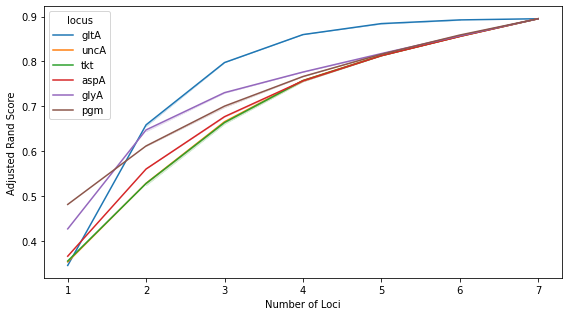

In [5]:
fig, ax = plt.subplots(figsize=(8,4.5))
sns.lineplot(data=lociMerge, x='n', y='score', hue='locus', ci=0, ax=ax)
ax.set_xlabel('Number of Loci')
ax.set_ylabel('Adjusted Rand Score')
fig.tight_layout()
fig.savefig(f'{path}/MLST_NG20score.png', dpi=300)